In [22]:
from PIL import Image
import numpy as np
from skimage import measure, filters, morphology

# Parte 6
## 6.1 Binarizar la imagen:

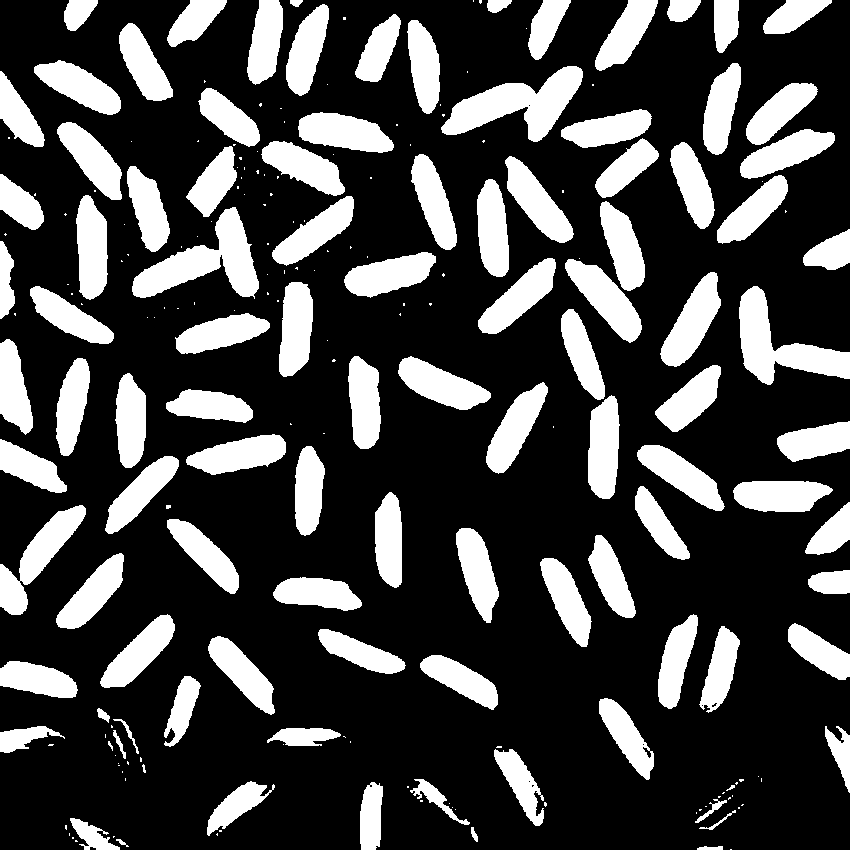

In [3]:
img = Image.open('assets/rice.jpg')

def binarize(img):
    
    if img.mode == 'RGB':
        img = img.convert('L')
    
    img = np.array(img)
    
    binary = (img > 128).astype(np.uint8) * 255

    return Image.fromarray(binary), binary

bin_image, bin_array = binarize(img)

bin_image

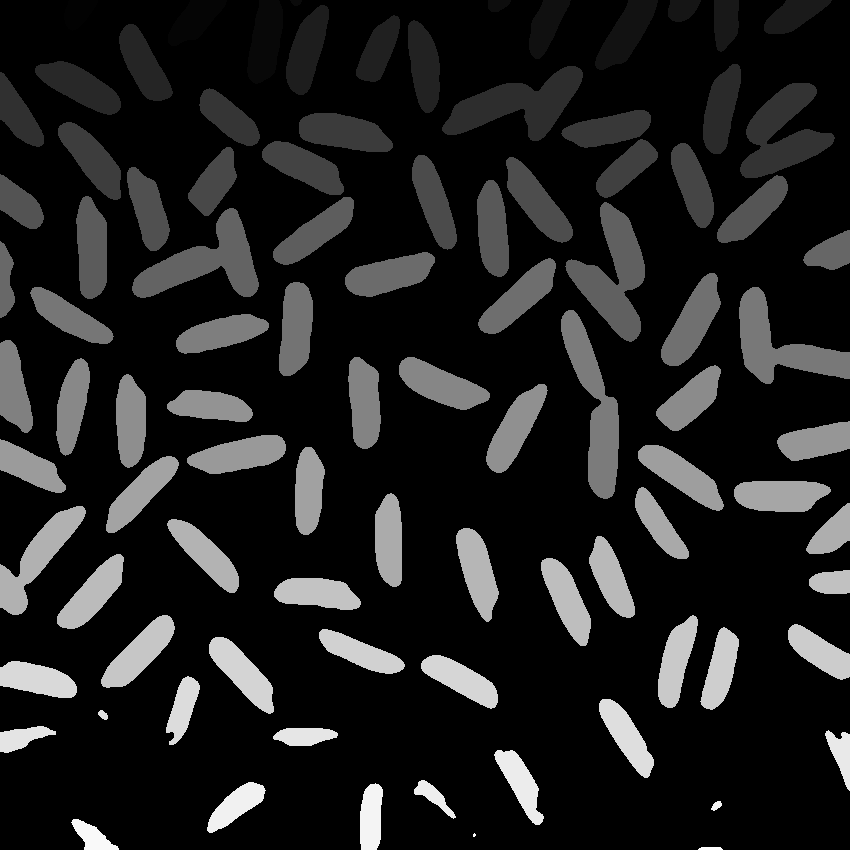

In [23]:
def structures(md):
    median = filters.median(bin_array, morphology.disk(md))
    labeled_filtered, num_features_filtered = measure.label(median, background=0, return_num=True)
    labeled_filtered_image = Image.fromarray((labeled_filtered * 255 / labeled_filtered.max()).astype(np.uint8))
    display(labeled_filtered_image)
    return num_features_filtered
arroz = structures(5) 

## 6.2 Contar granos de arroz:

In [24]:
print("Numero de granos de arroz: {}".format(arroz))

Numero de granos de arroz: 95


# Parte 8
**A**: Erosion. El elemento estructurante es una U con traslacion hacia un lado. 

**B**: Erosion. El elemento estructurante son los dos puntos abajo. 

**C**: Erosion seguida por dilatacion, ya que los bordes estan redondeados. El elemento estructurante son dos columnas a los lados. 

**D**: Dilatacion seguida por erosion, ya que es mas grande que la imagen original pero los bordes estan redondeados. El elemento estructurante es la U. 